In [1]:
from numpy import sort
from xgboost import XGBClassifier
# from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

import random
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

from sklearn import svm


from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold

import lightgbm as lgb 


C:\Users\20432\Anaconda\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\20432\Anaconda\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\20432\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
data1=pd.read_csv("E:研究/在做/i6mA-vote/处理后的数据/Rosaceaetr_binary_EIIP.csv",encoding='gbk',engine='python',header=None)
data2=pd.read_csv("E:研究/在做/i6mA-vote/处理后的数据/Rosaceaete+binary+EIIP.csv",encoding='gbk',engine='python',header=None)
# print(data1.shape,data2.shape)

In [3]:
data1 = np.array(data1)
data2 = np.array(data2)

In [4]:
train_y =data1[:,0] 
test_y = data2[:,0]
print(train_y)
print(test_y.shape)

[1. 1. 1. ... 0. 0. 0.]
(14598,)


In [5]:
train_x = np.delete(data1,0, axis = 1)
test_x = np.delete(data2,0,axis=1)

In [6]:
model1 = XGBClassifier(random_state=10,n_jobs=-1)
model2 = GradientBoostingClassifier(random_state=10)
model3 = lgb.LGBMClassifier(random_state=10,n_jobs=-1)
stack=model1


In [7]:
stack.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
import shap


explainer = shap.TreeExplainer(stack)
shap_values = explainer.shap_values(train_x) # 传入特征矩阵X，计算SHAP值

In [16]:
print(shap_values.shape)

(58670, 205)


In [13]:
name=[]
for i in range(164):
    name.append('One-hot_'+str(i))
for j in range(41):
    name.append('EIIP_'+str(j))
print(name)

['One-hot_0', 'One-hot_1', 'One-hot_2', 'One-hot_3', 'One-hot_4', 'One-hot_5', 'One-hot_6', 'One-hot_7', 'One-hot_8', 'One-hot_9', 'One-hot_10', 'One-hot_11', 'One-hot_12', 'One-hot_13', 'One-hot_14', 'One-hot_15', 'One-hot_16', 'One-hot_17', 'One-hot_18', 'One-hot_19', 'One-hot_20', 'One-hot_21', 'One-hot_22', 'One-hot_23', 'One-hot_24', 'One-hot_25', 'One-hot_26', 'One-hot_27', 'One-hot_28', 'One-hot_29', 'One-hot_30', 'One-hot_31', 'One-hot_32', 'One-hot_33', 'One-hot_34', 'One-hot_35', 'One-hot_36', 'One-hot_37', 'One-hot_38', 'One-hot_39', 'One-hot_40', 'One-hot_41', 'One-hot_42', 'One-hot_43', 'One-hot_44', 'One-hot_45', 'One-hot_46', 'One-hot_47', 'One-hot_48', 'One-hot_49', 'One-hot_50', 'One-hot_51', 'One-hot_52', 'One-hot_53', 'One-hot_54', 'One-hot_55', 'One-hot_56', 'One-hot_57', 'One-hot_58', 'One-hot_59', 'One-hot_60', 'One-hot_61', 'One-hot_62', 'One-hot_63', 'One-hot_64', 'One-hot_65', 'One-hot_66', 'One-hot_67', 'One-hot_68', 'One-hot_69', 'One-hot_70', 'One-hot_71', '

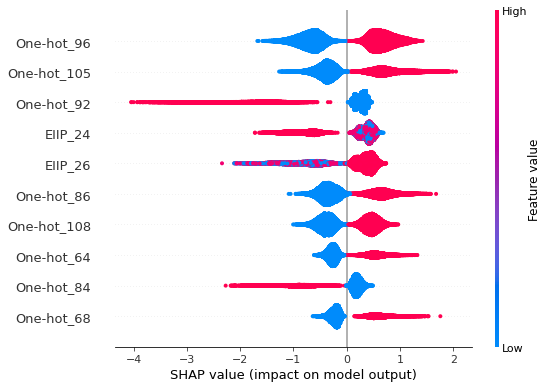

In [17]:
# summarize the effects of all the features
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, train_x,show=False,feature_names=name,max_display = 10)
plt.savefig("Feature importance1.tif", dpi =300)